In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
#import ptitprince as pt

from scipy import stats
from scipy.stats import ttest_ind

In [3]:
def read_modelfile(path, age):
    df = pd.read_csv(path)
    df.rename(columns={'Unnamed: 0':'param'}, inplace=True)
    df['group']=age
    return df

In [11]:
YA_simpleHDDM = read_modelfile('eyemem1_params_simplemodel_YA.csv', 'YA')
OA_simpleHDDM = read_modelfile('eyemem1_params_simplemodel_OA.csv', 'OA')
YA_biasHDDM = read_modelfile('eyemem1_study_params_biasmodel_YA.csv', 'YA')
OA_biasHDDM = read_modelfile('eyemem1_study_params_biasmodel_OA.csv', 'OA') 

In [6]:
def get_param(df, p):
    # p needs to be a string of the parameter you wanna extract
    # all param values, so the average param over all subjects + std and one param value per subject
    param = df[df['param'].str.match(p)]
   
    # only param values per subject
    subj_param = df[df['param'].str.match(p +'_su')]
    
    return subj_param

In [16]:
YA_simpleHDDM_t = get_param(YA_simpleHDDM,'t')
YA_simpleHDDM_a = get_param(YA_simpleHDDM,'a')
YA_simpleHDDM_v = get_param(YA_simpleHDDM,'v')
#simpleHDDM_a.head()

In [17]:
OA_simpleHDDM_t = get_param(OA_simpleHDDM,'t')
OA_simpleHDDM_a = get_param(OA_simpleHDDM,'a')
OA_simpleHDDM_v = get_param(OA_simpleHDDM,'v')
#OA_simpleHDDM_a.head()

In [12]:
YA_biasHDDM_t = get_param(YA_biasHDDM,'t')
YA_biasHDDM_a = get_param(YA_biasHDDM,'a')
YA_biasHDDM_v = get_param(YA_biasHDDM,'v')
YA_biasHDDM_z = get_param(YA_biasHDDM,'z')
YA_biasHDDM_dc = get_param(YA_biasHDDM,'dc')

# getting params of bias model for OA
OA_biasHDDM_t = get_param(OA_biasHDDM,'t')
OA_biasHDDM_a = get_param(OA_biasHDDM,'a')
OA_biasHDDM_v = get_param(OA_biasHDDM,'v')
OA_biasHDDM_z = get_param(OA_biasHDDM,'z')
OA_biasHDDM_dc = get_param(OA_biasHDDM,'dc')

In [19]:
simpleHDDM_a = YA_simpleHDDM_a.append(OA_simpleHDDM_a, ignore_index=True)
simpleHDDM_v = YA_simpleHDDM_v.append(OA_simpleHDDM_v, ignore_index=True)
simpleHDDM_t = YA_simpleHDDM_t.append(OA_simpleHDDM_t, ignore_index=True)

Simple Model might not be of much interest to us anymore. **To Do: check simple model again and the potential value of it - it uses accuracy coding**

In [14]:
def plot_bar(df, parameter, p_val, model_type):
    
    fig, ax = plt.subplots(figsize=(8,6))

    sns.set(style="whitegrid")


    sns.barplot(x="age", y=parameter, data=df,  capsize=.1, color='lightblue') # ci="sd"
    sns.swarmplot(x="age", y=parameter, data=df, color="0", alpha=.35)
    # show the mean
    for p in ax.patches:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h / 2)
        text = f'Mean:\n{h:0.2f}'
        ax.annotate(text=text, xy=xy, ha='right', va='center_baseline')

    # statistical annotation
    x1, x2 = 0, 1   
    y, h, col = df[parameter].max()+0.09,0.09, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    plt.text((x1+x2)*.5, y+h, p_val, ha='center', va='bottom', color=col)
    plt.title("Simple PyDDM {} OA vs YA {}".format(model_type, parameter))
    #plt.savefig('/Users/terlau/LNDG/EyeMem/EyeMem_1/DDM/{}_test_eyemem1_{}.png'.format(model_type, parameter))
    plt.show()
    plt.close()

In [168]:
def plot_raincloud(df, model, p):
    #adding color
    flatui = ['green','blue']#["#2ecc71", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

    my_pal = sns.color_palette(flatui)#sns.color_palette("husl")
    # plotting the clouds
    f, ax = plt.subplots(figsize=(10, 7))

    dy="group"; dx="mean"; ort="h"; 
    pal = sns.color_palette(n_colors=1)
    ax=pt.half_violinplot(x=dx, y=dy, data=df, palette = my_pal, bw = .2, cut = 0.,scale = "area", 
                          width = .6, inner = None, orient = ort)

    ax=sns.stripplot(x=dx, y=dy, data=df, palette = my_pal, edgecolor = "white",size = 5, jitter = 1, 
                     zorder = 0, orient = ort)

    ax=sns.boxplot(x=dx, y=dy, data=df, color = "black", width = .15, zorder = 10, showcaps = True, 
                   boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, 
                   whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.title("{} for YA vs OA {} model".format(p, model), pad=20)
    #plt.tight_layout()
    #plt.savefig('eyemem1_{}_model_{}.png'.format(model,p), bbox_inches='tight')

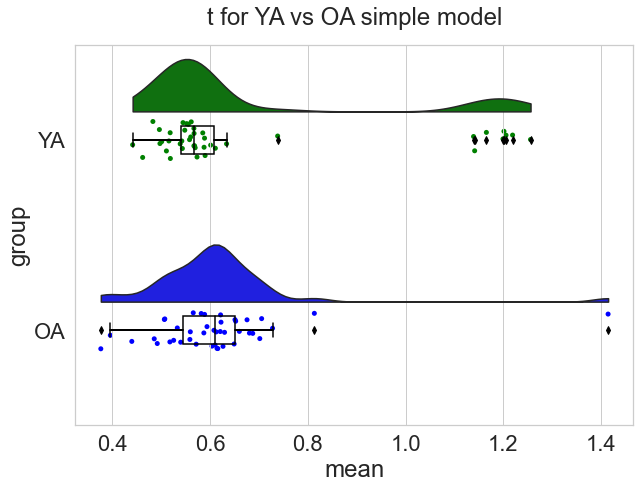

In [169]:
#plot_raincloud(simple_model_t, 'simple', 't')
#plot_raincloud(simple_model_v, 'simple', 'v')
#plot_raincloud(simple_model_a, 'simple', 'a')

**To Do: check if saved hddm model files (created with pickle) are equal to the dfs created here. If so I could just load them and save a couple steps here**

In [9]:
bias_model_v = bias_subj_v.append(OA_bias_subj_v, ignore_index=True)
bias_model_v

,param,mean,std,2.5q,25q,50q,75q,97.5q,mc err,group
0,v_subj.9,4.234340,0.348055,3.552075,4.002356,4.223552,4.462863,4.944668,0.025240,YA
1,v_subj.10,2.865399,0.347401,2.290212,2.629444,2.821922,3.056981,3.681657,0.024301,YA
2,v_subj.15,1.762987,0.158627,1.444069,1.657414,1.763646,1.871845,2.060410,0.004941,YA
3,v_subj.17,2.331268,0.247152,1.856176,2.157748,2.336662,2.506617,2.795919,0.014859,YA
4,v_subj.18,2.275057,0.239736,1.858939,2.103270,2.260864,2.425175,2.786225,0.014396,YA
...,...,...,...,...,...,...,...,...,...,...
79,v_subj.94,1.519111,0.134640,1.255338,1.431169,1.515628,1.607377,1.785533,0.003614,OA
80,v_subj.96,1.731078,0.205501,1.370038,1.588471,1.716735,1.851884,2.209604,0.011718,OA
81,v_subj.99,2.066116,0.248298,1.587994,1.893218,2.070208,2.236338,2.551340,0.016500,OA
82,v_subj.100,1.203211,0.126623,0.961634,1.116455,1.201723,1.286200,1.453336,0.003301,OA


In [11]:
bias_model_a = bias_subj_a.append(OA_bias_subj_a, ignore_index=True)
bias_model_a

,param,mean,std,2.5q,25q,50q,75q,97.5q,mc err,group
0,a_subj.9,2.954095,0.429325,2.223701,2.640879,2.915141,3.228183,3.911640,0.036465,YA
1,a_subj.10,2.048423,0.300402,1.642181,1.849444,1.982464,2.170355,2.870642,0.023736,YA
2,a_subj.15,1.989654,0.122690,1.768419,1.903678,1.980733,2.063195,2.252018,0.004542,YA
3,a_subj.17,2.660927,0.330569,2.103711,2.420941,2.635389,2.880345,3.393388,0.023032,YA
4,a_subj.18,2.180021,0.262259,1.772268,1.997184,2.142437,2.319846,2.739638,0.019374,YA
...,...,...,...,...,...,...,...,...,...,...
79,a_subj.94,2.071656,0.124179,1.840792,1.986005,2.064720,2.150853,2.331253,0.004278,OA
80,a_subj.96,2.645610,0.341500,2.153712,2.400232,2.590179,2.819619,3.586682,0.023173,OA
81,a_subj.99,2.833935,0.400175,2.205709,2.528996,2.803779,3.091580,3.682379,0.029813,OA
82,a_subj.100,2.009731,0.112662,1.804363,1.930145,2.007726,2.084165,2.235528,0.003733,OA


In [12]:
bias_model_t = bias_subj_t.append(OA_bias_subj_t, ignore_index=True)
bias_model_t

,param,mean,std,2.5q,25q,50q,75q,97.5q,mc err,group
0,t_subj.9,0.410406,0.030569,0.346049,0.389732,0.412252,0.432616,0.462618,0.002455,YA
1,t_subj.10,0.414523,0.022571,0.354857,0.403827,0.418356,0.430069,0.449350,0.001609,YA
2,t_subj.15,0.443576,0.017442,0.405932,0.432221,0.444510,0.456203,0.473807,0.000626,YA
3,t_subj.17,0.493952,0.033133,0.421214,0.472499,0.496805,0.518104,0.551038,0.002110,YA
4,t_subj.18,0.504441,0.026749,0.447281,0.489878,0.507613,0.523065,0.546013,0.001815,YA
...,...,...,...,...,...,...,...,...,...,...
79,t_subj.94,0.614074,0.021595,0.566640,0.600975,0.615839,0.629224,0.653151,0.000767,OA
80,t_subj.96,0.636085,0.045405,0.532377,0.607412,0.642427,0.670291,0.704322,0.002806,OA
81,t_subj.99,0.598280,0.041032,0.510026,0.572754,0.602197,0.628706,0.663116,0.002819,OA
82,t_subj.100,0.668551,0.022080,0.627769,0.654480,0.668031,0.680077,0.720663,0.000765,OA


In [13]:
bias_model_z = bias_subj_z.append(OA_bias_subj_z, ignore_index=True)
bias_model_z

,param,mean,std,2.5q,25q,50q,75q,97.5q,mc err,group
0,z_subj.9,0.521256,0.025948,0.471553,0.502802,0.520956,0.539258,0.572598,0.001176,YA
1,z_subj.10,0.532199,0.024374,0.484274,0.515659,0.532289,0.548695,0.580467,0.000848,YA
2,z_subj.15,0.547988,0.023817,0.503064,0.532030,0.547231,0.564537,0.595186,0.000804,YA
3,z_subj.17,0.516011,0.024847,0.467289,0.498594,0.515958,0.533281,0.564418,0.000852,YA
4,z_subj.18,0.514166,0.024293,0.465211,0.497750,0.514508,0.530785,0.560723,0.000739,YA
...,...,...,...,...,...,...,...,...,...,...
79,z_subj.94,0.506801,0.027966,0.451878,0.487908,0.507183,0.525883,0.561072,0.000892,OA
80,z_subj.96,0.528325,0.028317,0.471125,0.509068,0.528314,0.547609,0.583369,0.001012,OA
81,z_subj.99,0.482258,0.027389,0.428823,0.463644,0.482395,0.501719,0.534919,0.001045,OA
82,z_subj.100,0.412027,0.027344,0.358123,0.393599,0.411219,0.430841,0.467101,0.000904,OA


In [14]:
bias_model_dc = bias_subj_dc.append(OA_bias_subj_dc, ignore_index=True)
bias_model_dc

,param,mean,std,2.5q,25q,50q,75q,97.5q,mc err,group
0,dc_subj.9,0.081022,0.247574,-0.405956,-0.092806,0.077767,0.259286,0.557049,0.010272,YA
1,dc_subj.10,-0.586670,0.222646,-1.035545,-0.728144,-0.579709,-0.434606,-0.170231,0.007630,YA
2,dc_subj.15,-0.810945,0.167773,-1.138919,-0.919410,-0.805436,-0.696568,-0.493555,0.005749,YA
3,dc_subj.17,-0.279465,0.178865,-0.630143,-0.398060,-0.281008,-0.155244,0.072212,0.006122,YA
4,dc_subj.18,-0.486898,0.190181,-0.854545,-0.619207,-0.483652,-0.362073,-0.097435,0.006123,YA
...,...,...,...,...,...,...,...,...,...,...
79,dc_subj.94,-0.633561,0.152887,-0.937534,-0.735148,-0.636889,-0.531904,-0.325211,0.004559,OA
80,dc_subj.96,0.075251,0.156794,-0.239033,-0.031448,0.076131,0.179977,0.391674,0.005599,OA
81,dc_subj.99,-0.020244,0.170243,-0.349903,-0.137185,-0.021376,0.093213,0.324288,0.006672,OA
82,dc_subj.100,0.446268,0.143406,0.157589,0.350852,0.448527,0.542358,0.719521,0.004591,OA


**To Do: Flip raincloud plots!**

In [13]:
#plot_raincloud(bias_model_v, 'bias', 'v')
plot_raincloud(bias_model_t, 'bias', 't')
plot_raincloud(bias_model_a, 'bias', 'a')

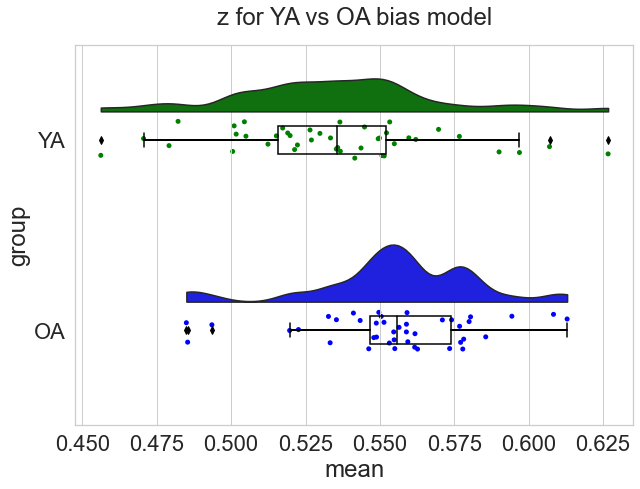

In [228]:
plot_raincloud(bias_model_z, 'bias', 'z')

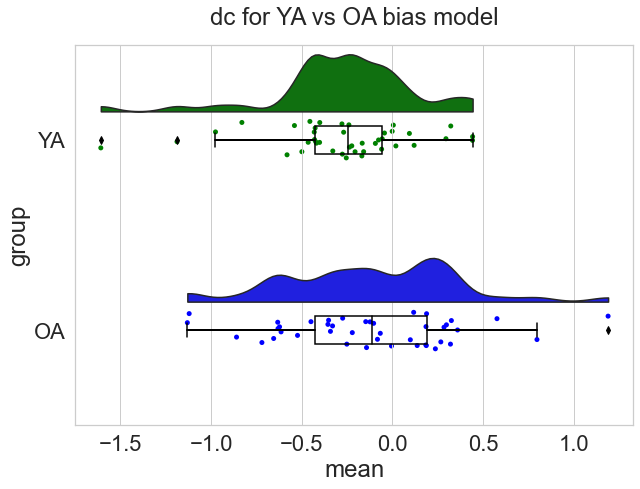

In [229]:
plot_raincloud(bias_model_dc, 'bias', 'dc')

### T & P Values for Simple Model (accuracy coding) YA vs OA

In [22]:
def t_test(df1, df2, val):
    '''returns t and corresponding p value for given df columns'''
    t,p = stats.ttest_ind(df1['mean'],df2['mean'])
    print("The difference between means", np.mean(df1['mean']), np.mean(df2['mean']))
    print(val+ " t-val:", t, "p-val:", p)
    return p

In [25]:
t_test(YA_simpleHDDM_v,OA_simpleHDDM_v, 'Drift')
t_test(YA_simpleHDDM_a,OA_simpleHDDM_a, 'Boundary')
t_test(YA_simpleHDDM_t,OA_simpleHDDM_t, 'Non-decision time')

The difference between means 0.8508524662043148 0.640834867107044
Drift t-val: 3.564771794135571 p-val: 0.0006106605206455072
The difference between means 1.3669920715254942 1.2401313403839607
Boundary t-val: 2.6428135296689956 p-val: 0.009846707429345436
The difference between means 0.6741548920277113 0.61241881686812
Non-decision time t-val: 1.3314321165270029 p-val: 0.18673647369017515


0.18673647369017515

Drift and Boundary show significant difference, nondecision time seems to be very similar for YA and OA

### T & P Values for Bias Model (stim coding) YA vs OA

In [26]:
import researchpy as rp

In [28]:
t_test(YA_biasHDDM_v,OA_biasHDDM_v, 'Drift')
t_test(YA_biasHDDM_a,OA_biasHDDM_a, 'Boundary')
t_test(YA_biasHDDM_t,OA_biasHDDM_t, 'Non-decision time')
t_test(YA_biasHDDM_dc,OA_biasHDDM_dc, 'Drift Bias')
t_test(YA_biasHDDM_z,OA_biasHDDM_z, 'Starting Point Bias')

The difference between means 1.8552304159789403 0.8646952007474227
Drift t-val: 4.467143172120393 p-val: 2.5134798484624463e-05
The difference between means 2.53847772159805 2.4154355796561178
Boundary t-val: 1.1837532891283429 p-val: 0.2399309909055808
The difference between means 0.4609498218899662 0.5728091958641431
Non-decision time t-val: -5.916193430136472 p-val: 7.326938264963561e-08
The difference between means -0.2233787122460512 0.30151423668932076
Drift Bias t-val: -2.5804098075600725 p-val: 0.011650404998214322
The difference between means 0.5242182263270484 0.49734701098041323
Starting Point Bias t-val: 2.8673508248422928 p-val: 0.005259695106544605


0.005259695106544605

In [29]:
summary, results = rp.ttest(group1= YA_biasHDDM_z['mean'], group1_name= "YA",
                            group2= OA_biasHDDM_z['mean'], group2_name= "OA")
print(summary)

   Variable     N      Mean        SD        SE  95% Conf.  Interval
0        YA  42.0  0.524218  0.031968  0.004933   0.514256  0.534180
1        OA  42.0  0.497347  0.051639  0.007968   0.481255  0.513439
2  combined  84.0  0.510783  0.044775  0.004885   0.501066  0.520499


In [30]:
print(results)

          Independent t-test  results
0    Difference (YA - OA) =    0.0269
1      Degrees of freedom =   82.0000
2                       t =    2.8674
3   Two side test p value =    0.0053
4  Difference < 0 p value =    0.9974
5  Difference > 0 p value =    0.0026
6               Cohen's d =    0.6257
7               Hedge's g =    0.6200
8           Glass's delta =    0.8406
9             Pearson's r =    0.3019


#### Population distributions are normal

In [31]:
sampling_difference = YA_biasHDDM_z['mean'].values - \
                      OA_biasHDDM_z['mean'].values

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.9540501236915588, pvalue=0.09026933461427689)

 The test is not significant which indicates the sampling distribution is normally distributed. 

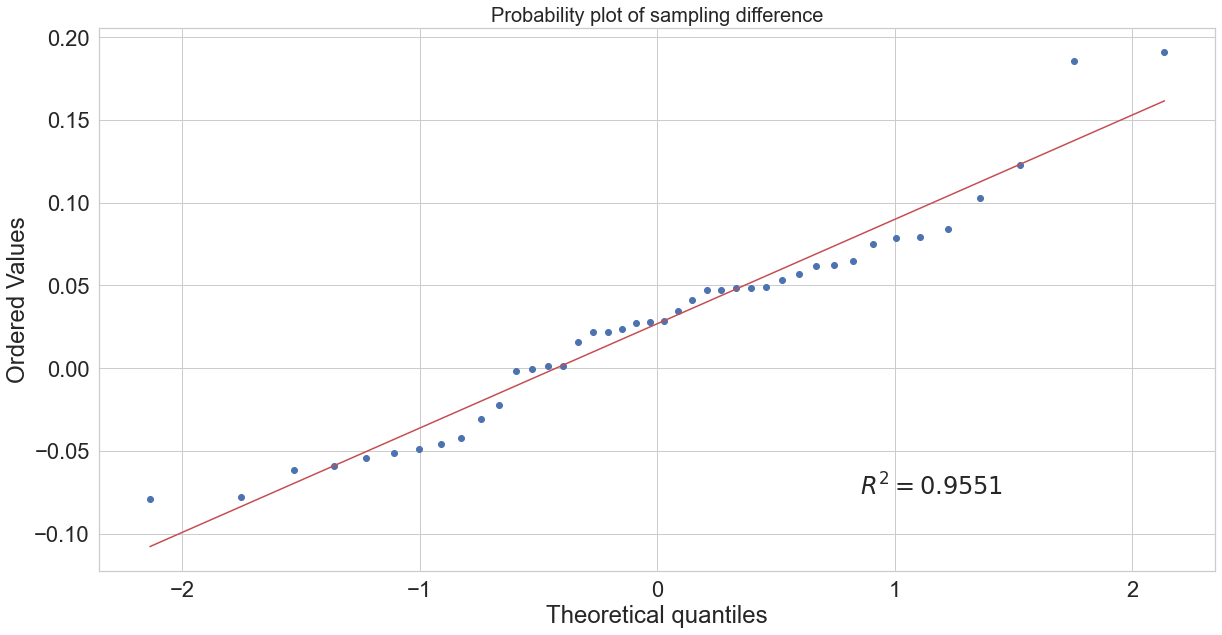

In [32]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

#### Homogeneity of variance

One of the assumptions is that both groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats. 

In [47]:
stats.levene(bias_subj_z['mean'],
             OA_bias_subj_z['mean'],
             center= 'mean')

LeveneResult(statistic=2.3191526078038986, pvalue=0.1316369647391978)

The test is not significant which indicates the groups have same amount of variation and that the t-test whould be a suitable statistical method to be used. Again, it may be worthwhile to check this assumption visually as well. 

DC and non-decision time (t) are not significant, the other paramters are.

**To Do: Move up section on checking if prereq for t-test are met before the actual t testing. Possibly improve the plots of HDDM params below here**

In [42]:
def plot_bar(df, param, p_val, model_type):
 

    fig, ax = plt.subplots(figsize=(8,6))

    #sns.set(style="whitegrid")
  
    sns.barplot(x="group", y='mean', data=df,  capsize=.1, color='lightblue') # ci="sd"
    sns.swarmplot(x="group", y='mean', data=df, color="0", alpha=.35)
    plt.rcParams.update({'font.size': 15})
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    # show the mean
    for p in ax.patches:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h / 2)
        text = f'Mean:\n{h:0.2f}'
        ax.annotate(text=text, xy=xy, ha='center', va='center')
        #xy = ((x + w / 2.), (h / 2)+0.1)
        #text = f'Mean:\n{h:0.2f}'
        #ax.annotate(text=text, xy=xy, ha='right', va='bottom', fontsize=14)

    # statistical annotation
    x1, x2 = 0, 1   
    y, h, col = df['mean'].max()+0.09,0.09, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    plt.text((x1+x2)*.5, y+h, p_val, ha='center', va='bottom', color=col)
 
   # y, h, col = df['mean'].max()-0.009,0.02, 'k'
    #plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    #plt.text((x1+x2)*.5, y+h, p_val, ha='center', va='bottom', color=col, fontsize=14)
    plt.xlabel('Age Group', fontsize=16)
    plt.ylabel('{}'.format(param), fontsize=16)
    #plt.ylim(0.5,2.2)
    plt.title("{} OA vs YA".format(param), fontdict={'fontsize': 18}, pad=15)
    #plt.axhline(y=0.5, color='r', linestyle='dotted')
    plt.savefig('/Users/terlau/LNDG/EyeMem/HDDM/plots/{}_study_eyemem1_{}.png'.format(model_type, param))
    plt.show()
    plt.close()

### Plots for Bias Model with Stats

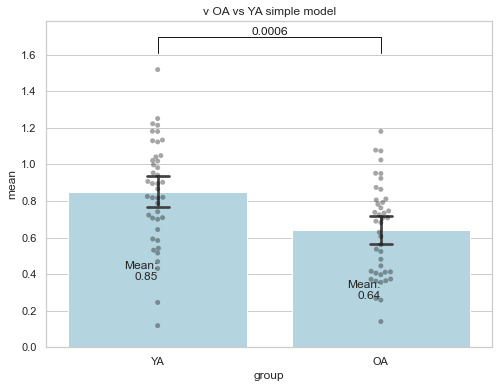

In [259]:
plot_bar(simple_model_v, 'v', '0.0006', 'simple model') 

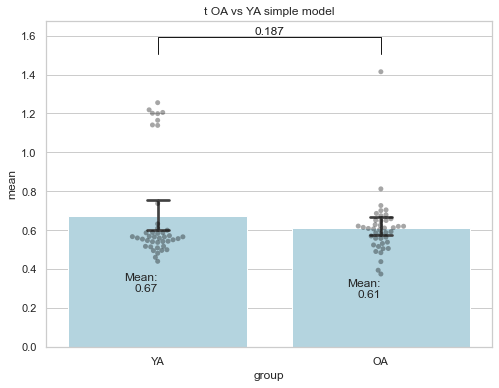

In [264]:
plot_bar(simple_model_t, 't', '0.187', 'simple model') 

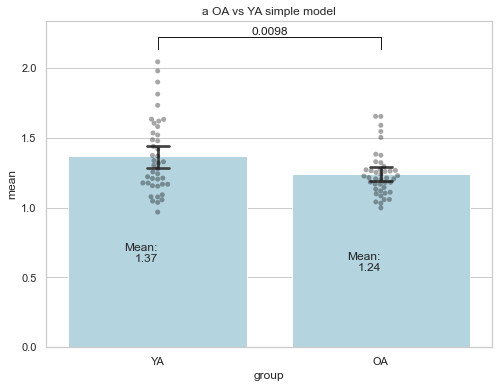

In [266]:
plot_bar(simple_model_a, 'a', '0.0098', 'simple model') 

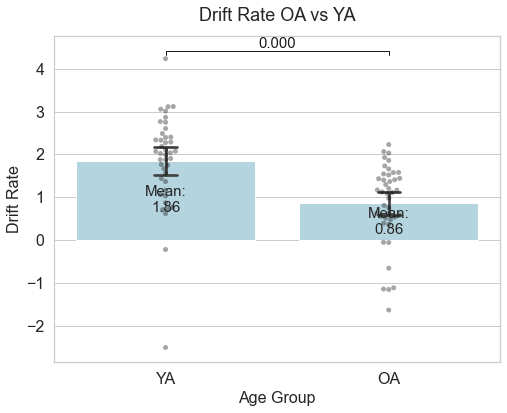

In [43]:
plot_bar(bias_model_v, 'Drift Rate', '0.000', 'bias model') 

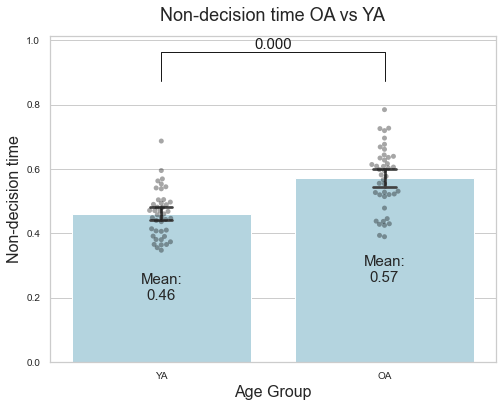

In [44]:
plot_bar(bias_model_t, 'Non-decision time', '0.000', 'bias model') 

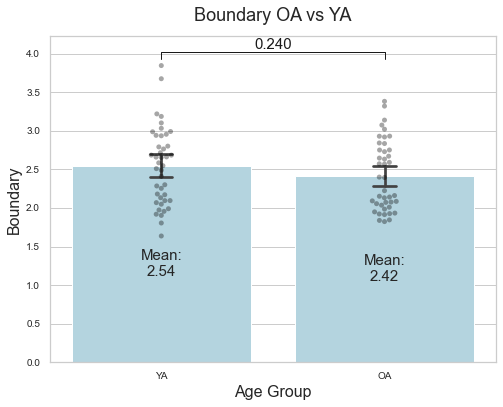

In [45]:
plot_bar(bias_model_a, 'Boundary', '0.240', 'bias model') 

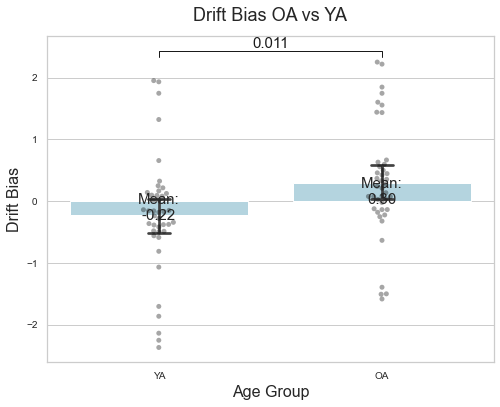

In [46]:
plot_bar(bias_model_dc, 'Drift Bias', '0.011', 'bias model') 

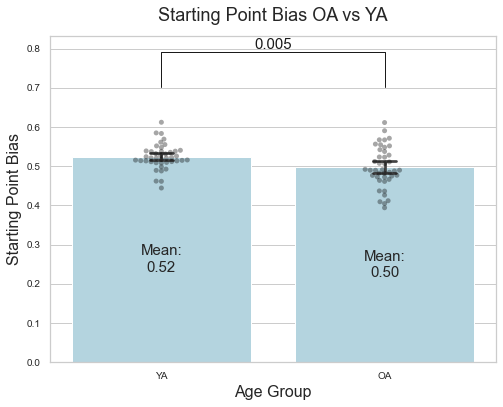

In [47]:
plot_bar(bias_model_z, 'Starting Point Bias', '0.005', 'bias model') 